In [1]:
import ComputationalHypergraphDiscovery as CHD
import jax.numpy as np
from jax import random
import networkx as nx
import joblib

Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.5023369477430212, Z=(1.00, 1.00), gamma=8.48e+02
Kernel [quadratic] has n/(n+s)=0.526527505920176, Z=(0.99, 1.00), gamma=9.34e+02
Kernel [gaussian] has n/(n+s)=0.020554848274262835, Z=(0.64, 0.69), gamma=8.95e+00
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


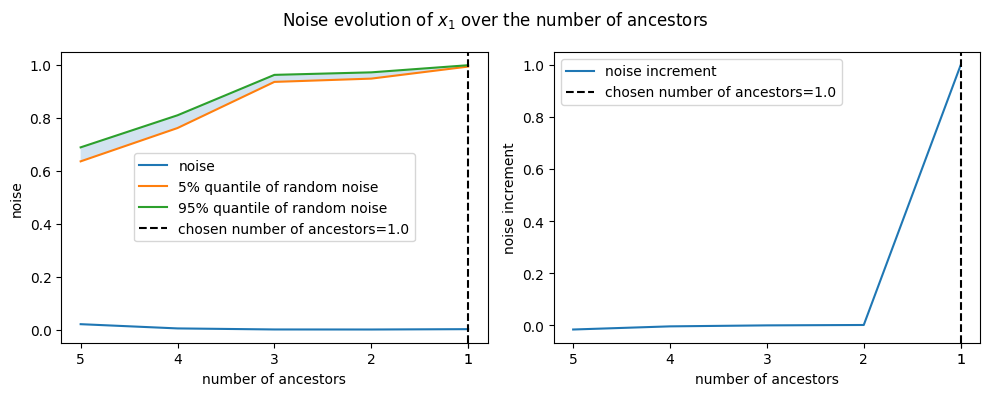

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.5092350970223397, Z=(0.99, 1.00), gamma=8.72e+02
Kernel [quadratic] has n/(n+s)=0.5286651959021285, Z=(0.99, 1.00), gamma=9.40e+02
Kernel [gaussian] has n/(n+s)=0.020859199262521173, Z=(0.63, 0.69), gamma=8.97e+00
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


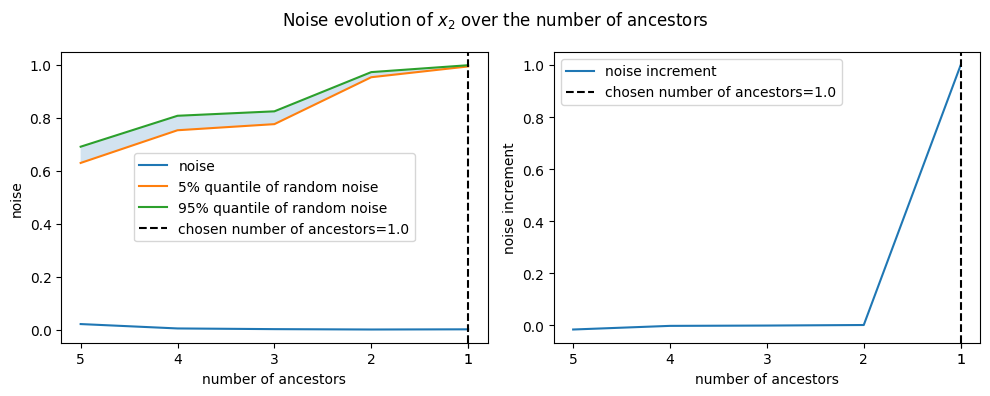

Ancestors of $x_2$: ['$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.5023369477430212, Z=(0.99, 1.00), gamma=8.48e+02
Kernel [quadratic] has n/(n+s)=0.526527505920176, Z=(0.99, 1.00), gamma=9.34e+02
Kernel [gaussian] has n/(n+s)=0.020554848274262835, Z=(0.63, 0.69), gamma=8.95e+00
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


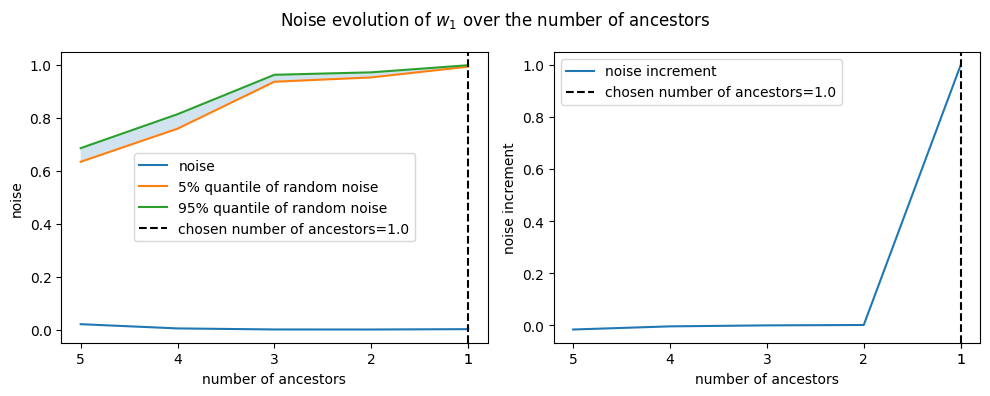

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.5092350970223397, Z=(0.99, 1.00), gamma=8.72e+02
Kernel [quadratic] has n/(n+s)=0.5286651959021288, Z=(0.99, 1.00), gamma=9.40e+02
Kernel [gaussian] has n/(n+s)=0.020859199262521208, Z=(0.63, 0.69), gamma=8.97e+00
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


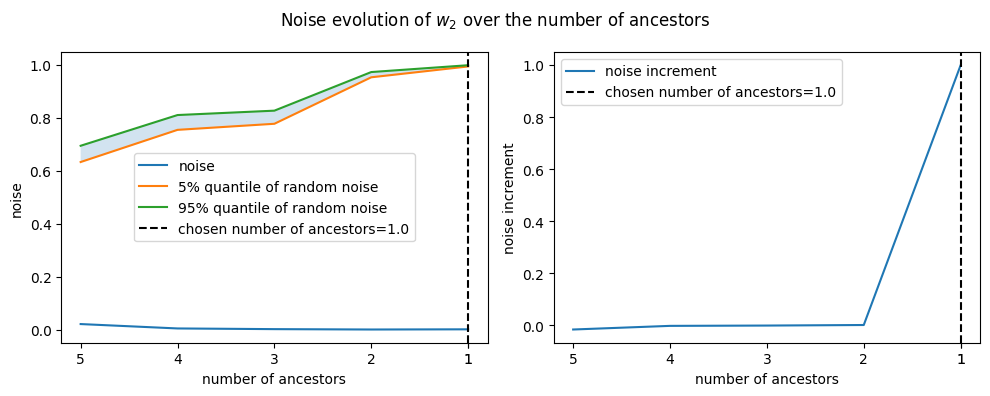

Ancestors of $w_2$: ['$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9981819612637819, Z=(0.99, 1.00), gamma=1.06e+03
Kernel [quadratic] has n/(n+s)=0.9966603477010632, Z=(0.99, 1.00), gamma=1.19e+03
Kernel [gaussian] has n/(n+s)=0.7704663330916928, Z=(0.73, 0.79), gamma=3.48e+00
$w_3$ has no ancestors


Results for $w_4$
Kernel [linear] has n/(n+s)=0.998448393707563, Z=(0.99, 1.00), gamma=9.77e+02
Kernel [quadratic] has n/(n+s)=0.994543523688548, Z=(0.99, 1.00), gamma=1.51e+03
Kernel [gaussian] has n/(n+s)=0.7927765434571981, Z=(0.74, 0.79), gamma=3.44e+00
$w_4$ has no ancestors



['predictions-example1.pkl']

In [2]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

# How many samples do we generate for training?
n_train = 420

W_train = random.normal(subkey, (n_train, 4))

X_train=np.concatenate([W_train[:,:2],W_train],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']
kernels=[CHD.Modes.LinearMode(), CHD.Modes.QuadraticMode(), CHD.Modes.GaussianMode(l=0.5)]
graph_discovery1=CHD.GraphDiscovery(X=X_train, names=node_names, kernels=kernels)
graph_discovery1.fit()
joblib.dump(graph_discovery1, "predictions-example1.pkl")

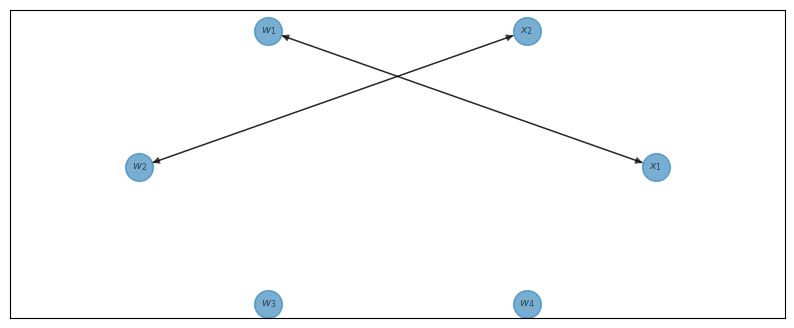

In [3]:
graph_discovery2 = joblib.load('predictions-example1.pkl')
graph_discovery2.plot_graph(type_label=True)

In [4]:
key, subkey = random.split(key)

# How many samples do we generate for prediction?
n_pred1 = n_train

# Create a (n_pred,2) block of all zeros for x1 and x2,
# then concatenate with W_pred to get the 6 total columns.
W_pred1 = random.normal(subkey, (n_pred1, 4))
X_pred1 = np.concatenate([np.zeros((n_pred1, 2)), W_pred1], axis=1)


In [5]:
predictions1 = graph_discovery2.predict(names=node_names, X_pred=X_pred1)

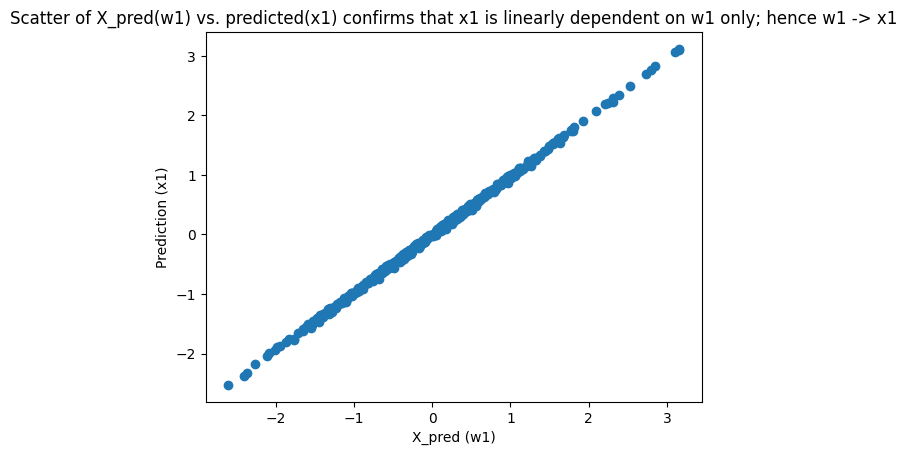

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pred1[:, 2], predictions1[:, 0])
plt.xlabel(f"X_pred (w1)")
plt.ylabel(f"Prediction (x1)")
plt.title(f"Scatter of X_pred(w1) vs. predicted(x1) confirms that x1 is linearly dependent on w1 only; hence w1 -> x1")
plt.show()

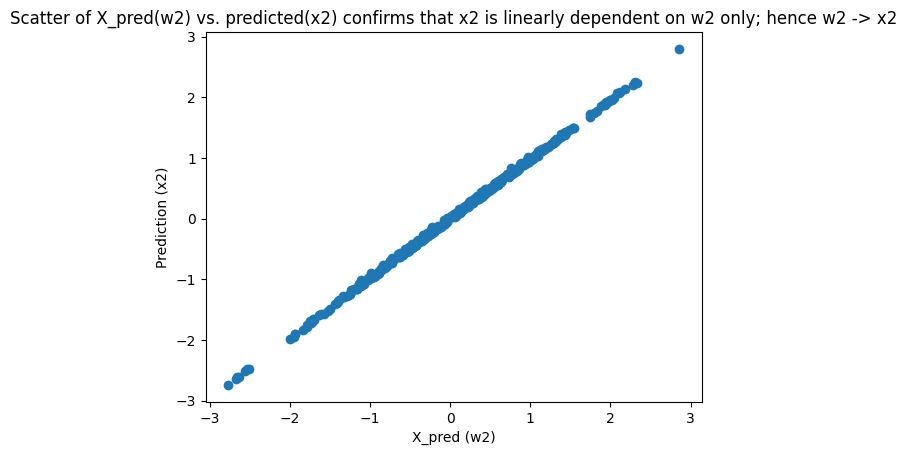

In [7]:
plt.figure()
plt.scatter(X_pred1[:, 3], predictions1[:, 1])
plt.xlabel(f"X_pred (w2)")
plt.ylabel(f"Prediction (x2)")
plt.title(f"Scatter of X_pred(w2) vs. predicted(x2) confirms that x2 is linearly dependent on w2 only; hence w2 -> x2")
plt.show()

In [8]:
key, subkey = random.split(key)

# How many samples do we generate for prediction?
n_pred2 = n_train

# Concatenate W_pred with a (n_pred,2) block of all zeros for w1 and w2 to get the 6 total columns.
W_pred2 = random.normal(subkey, (n_pred2, 4))
X_pred2 = np.concatenate([W_pred2, np.zeros((n_pred2, 2))], axis=1)

In [9]:
predictions2 = graph_discovery2.predict(names=node_names, X_pred=X_pred2)

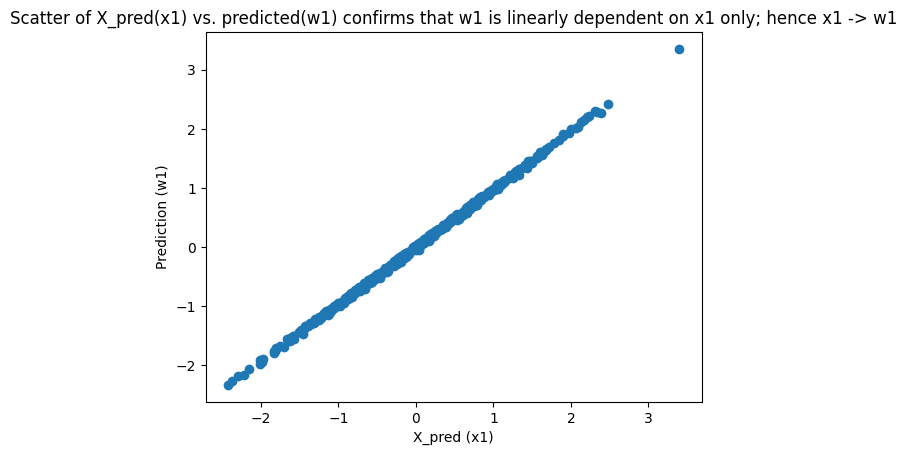

In [10]:
plt.figure()
plt.scatter(X_pred2[:, 0], predictions2[:, 2])
plt.xlabel(f"X_pred (x1)")
plt.ylabel(f"Prediction (w1)")
plt.title(f"Scatter of X_pred(x1) vs. predicted(w1) confirms that w1 is linearly dependent on x1 only; hence x1 -> w1")
plt.show()

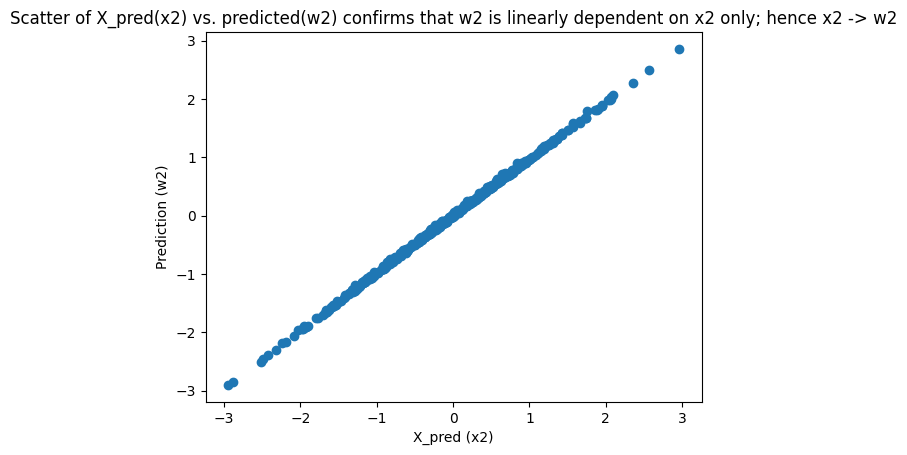

In [11]:
plt.figure()
plt.scatter(X_pred2[:, 1], predictions2[:, 3])
plt.xlabel(f"X_pred (x2)")
plt.ylabel(f"Prediction (w2)")
plt.title(f"Scatter of X_pred(x2) vs. predicted(w2) confirms that w2 is linearly dependent on x2 only; hence x2 -> w2")
plt.show()

In [ ]:
graph_discovery2.G.is_multigraph()
items2 = list(graph_discovery2.G.nodes.items())
edges = list(graph_discovery2.G.edges(data=True))
types = list(nx.get_edge_attributes(graph_discovery2.G, "type"))

In [23]:
graph_discovery2.names

['$x_1$', '$x_2$', '$w_1$', '$w_2$', '$w_3$', '$w_4$']

In [24]:
x1_dict = graph_discovery2.G.nodes.get('$x_1$')

In [25]:
x1_dict.get('active_modes')

Array([0., 0., 1., 0., 0., 0.], dtype=float64)

In [29]:
x1_dict.get('coeff').size

420

In [13]:
key, subkey = random.split(key)

# How many samples do we generate for prediction?
n_pred3 = 10

# Create a (n_pred,2) block of all zeros for x1 and x2,
# then concatenate with W_pred to get the 6 total columns.
W_pred3 = random.normal(subkey, (n_pred3, 4))
X_pred3 = np.concatenate([np.zeros((n_pred3, 2)), W_pred3], axis=1)

In [14]:
predictions3 = graph_discovery2.predict(names=node_names, X_pred=X_pred3)

TypeError: add got incompatible shapes for broadcasting: (420, 420), (10, 420).